# Airline Passenger Satisfaction

### Author Name: Yousaf Jan

### <span style="color:#83898b">*Understanding the roles of customer type, type of travel, flight distance and inflight service on satisfaction of airline passengers*</span>

Airplanes have become a mode of transportation since the early 20th century and with this new mode of transportation a new industry was made, Aviation. Airlines are organizations that take their passengers from one place to another crossing thousands of kilometers of distances which would previously take days or months in mere hours. Modern airlines are no longer just a means of transportation they provide various services to make the long journey comfortable and make sure that their passenger is satisfied. In this assignment I wanted to explore how satisfaction of passengers is affected by their experiences on flight. Specifically, I will explore the relationship between 4 variables which are customer type, type of travel, flight distance and inflight service and how they affect the satisfaction of the passenger. In each column there are several outcomes. Customer type is separated into two types of either Loyal or Disloyal. Type of travel is separated into Personal or Business while Flight Distance and Inflight Service are numeric values. Flight Distance measures distance traveled by the flight while Inflight Service is rating from 1-5. By analyzing all these variables, I want to find out which variables affect satisfaction, and which do not.

![Image of Airline](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/The_Travelers_delight.jpg/640px-The_Travelers_delight.jpg)

<p style="font-size: x-small">Kyle Saylors, Public domain, via <a href="https://commons.wikimedia.org/wiki/File:The_Travelers_delight.jpg">[Wikimedia Commons]</p>

## Methods
### Data Collection

This airline dataset was obtained from [Kaggle](https://www.kaggle.com/datasets), a free online resource of general datasets.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

In [2]:
# Load data
Passengers = pd.read_csv('airline.csv')

display(Passengers)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


### Data Cleaning

The Customer Type, Type of Travel and Satisfaction columns in the Passenger satisfaction dataset was recoded for better readability. 

In [3]:
Passengers = Passengers.replace({'Type of Travel': {'Business travel': 'Business', 'Personal Travel': 'Personal'}})

Passengers = Passengers.replace({'Customer Type': {'Loyal Customer': 'Loyal', 'disloyal Customer': 'Disloyal'}})

Passengers = Passengers.replace({'satisfaction': {'satisfied': 'Satisfied', 'neutral or dissatisfied': 'Neutral/Dissatisfied'}})

Passengers = Passengers.rename(columns={'satisfaction': 'Satisfaction'})

## Analyses

I will explore the relationships between Customer Type, Type of Travel, Flight Distance and Inflight service on satisfaction with exploratory analyses which will include visualizations and statistical summaries.

### Distributions

#### Loyalty

To begin I will explore distributions in our Passenger data. Figure below shows the distribution of Customer Types among the Passenger. As we can see by observing the Pie Chart below that most of the customers were Loyal.

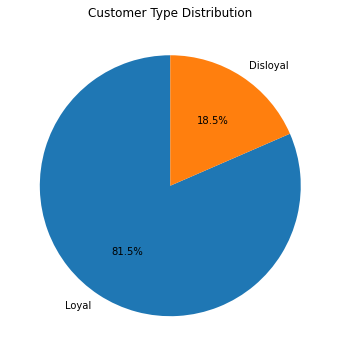

In [4]:
Cust_Type_Count = Passengers['Customer Type'].value_counts()

#Create a pie chart based on Customer Type
plt.figure(figsize=(6,6), facecolor='white')
plt.pie(Cust_Type_Count, labels=Cust_Type_Count.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Type Distribution')
plt.show()

#### Loyalty and Satisfaction

An examination of loyalty, and satisfaction status. The table below presents a summary of Satisfaction data which is summarised based on Customer Type and Satisfaction.

In [5]:
#Create a table by grouping Customer Type and Satisfaction together
grouped_passenger = Passengers.groupby(['Customer Type','Satisfaction']).size().unstack()

#Create a new column that calculates the Satisfaction Ratio by Customer Type
grouped_passenger['Satisfaction Ratio'] = (grouped_passenger['Satisfied'] / grouped_passenger.sum(axis=1)) * 100
grouped_passenger['Satisfaction Ratio'] = grouped_passenger['Satisfaction Ratio'].round(0)

#Display the table
display(grouped_passenger)

Satisfaction,Neutral/Dissatisfied,Satisfied,Satisfaction Ratio
Customer Type,,,
Disloyal,3591,1208,25.0
Loyal,10982,10195,48.0


An examination of the table shows us that disloyal passengers had a lower satisfaction level while loyal passengers had a higher satisfaction level. Loyal passengers had higher satisfaction ratio compared to disloyal passengers. Difference between the satisfaction ratio suggests that more loyal passengers tend to be satisfied compared to disloyal passengers. This relationship suggests passengers tended to be loyal based on their satisfaction. A further analysis reveals that loyalty does not really affect satisfaction as there are an almost equal number of passengers that are neutral/dissatisfied and that are satisfied who are both loyal to the airline. The figure below demonstrates this relationship.

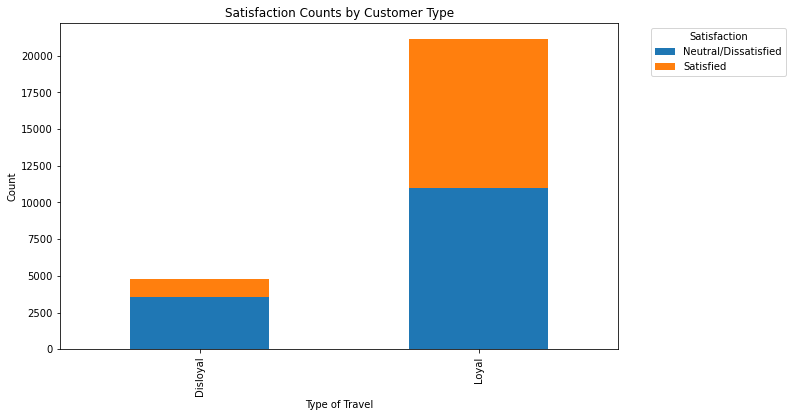

In [6]:
#Create a table by grouping Customer Type and Satisfaction together
grouped_passenger_graph = Passengers.groupby(['Customer Type','Satisfaction']).size().unstack()

#Make the bar bar graph based on grouped_passenger_graph
grouped_passenger_graph.plot(kind='bar', stacked=True, figsize=(10, 6))

#Label the graph
plt.title('Satisfaction Counts by Customer Type')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

#Display the graph
plt.show()

#### Type of Travel

The Airline had more Passengers that used it for Business purposes as opposed to Personal purposes.

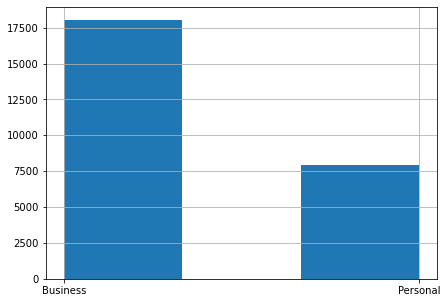

In [7]:
#Make and display a histogram based on Type of Travel
h = Passengers['Type of Travel'].hist(bins=3, figsize=(7, 5))

#### Type of Travel and Satisfaction

The table below presents a summary of satisfaction based on Type of Travel. 

In [8]:
#Group together Type of Travel and Satisfaction into a table
Type_Satisfaction= Passengers.groupby(['Type of Travel', 'Satisfaction']).size().unstack()

#Display the table
display(Type_Satisfaction)

Satisfaction,Neutral/Dissatisfied,Satisfied
Type of Travel,,
Business,7428,10610
Personal,7145,793


An examination of this table shows that majority of passengers that travel for business purposes are satisfied while the majority of those who travel for personal purposes are Neutral/Dissatisfied. The figure below visualizes the satisfaction based on type of travel. 

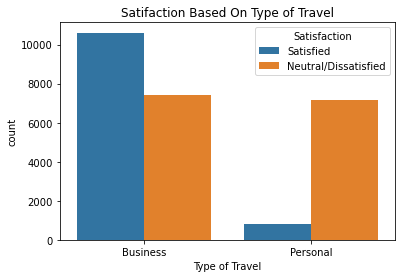

In [9]:
#Display a bar graph based on Type of Travel and Satisfaction
p = sns.countplot(data=Passengers, x="Type of Travel", hue="Satisfaction").set(title='Satifaction Based On Type of Travel')

#### Inflight Service

The figure below showcases that the majority of the passengers gave rating of 3 or higher for inflight service.

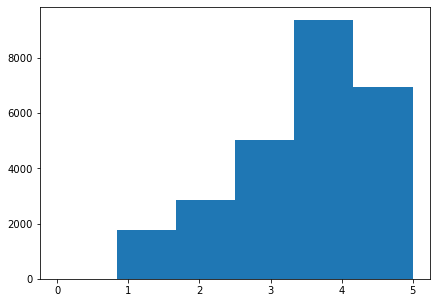

In [10]:
# Inflight service distribution
service = Passengers['Inflight service'].hist(bins=6, figsize=(7, 5),grid=False)


#### Flight Distance

The table below shows representation of flight distances, with each entry separated by 1000 kilometers.

In [11]:
#Create a range that will separate the Flight Distance by 1000 kilometers for every entry
kms_spread = range(0, int(Passengers['Flight Distance'].max()) + 1001, 1000)

#Create a new Column based on Flight Distane separated by kms_spread 
Passengers['Travel Distance'] = pd.cut(Passengers['Flight Distance'], bins=kms_spread, right=False)

#Get the average, min, max and count
distance_stats= Passengers.groupby('Travel Distance')['Flight Distance'].mean().reset_index().round(2)
distance_stats['Max'] = Passengers.groupby('Travel Distance')['Flight Distance'].max().values.round(2)
distance_stats['Min'] = Passengers.groupby('Travel Distance')['Flight Distance'].min().values.round(2)
distance_stats['Count'] = Passengers.groupby('Travel Distance')['Flight Distance'].count().values.round(2)

#Rename the Flight Distance column to Average Distance
distance_stats.rename(columns={'Flight Distance': 'Average Distance'}, inplace=True)

#Display the table
display(distance_stats)

,Travel Distance,Average Distance,Max,Min,Count
0,"[0, 1000)",503.03,999,31,15035
1,"[1000, 2000)",1431.23,1999,1000,5486
2,"[2000, 3000)",2463.37,2999,2000,3401
3,"[3000, 4000)",3501.89,3998,3000,2033
4,"[4000, 5000)",4654.76,4983,4000,21


By examining this table, we can see that majority of the flights are short-distance flights up to only 1000 kilometers of travel and with average distance traveled in that entry being around 503 kilometers. The 2nd entry which are medium-distance flights (1000-2000 kilometres) show that over 5400 passengers travel this far with the average travel distance being around 1430 kilometers. This trend continues with each entry. As the travel distance increases the number of passengers traveling that distance decreases. The figure below showcases this trend.

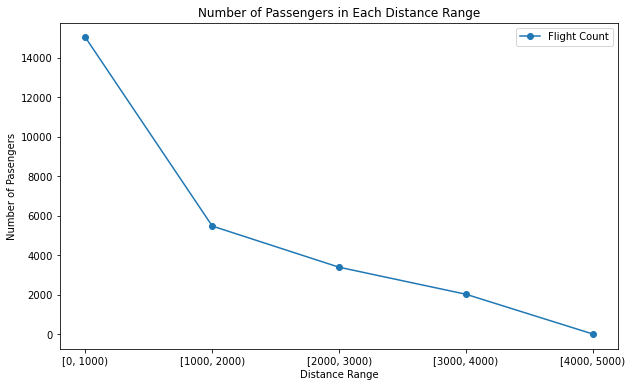

In [12]:
#Convert the Distance to string so that it can be used to plot on the x-axis
distance_labels = distance_stats['Travel Distance'].astype(str)

#Create a line graph based on Flight Distance
plt.figure(figsize=(10, 6),facecolor='white')
plt.plot(distance_labels, distance_stats['Count'], marker='o', label='Flight Count')

#Label the line graph
plt.xlabel('Distance Range')
plt.ylabel('Number of Pasengers')
plt.title('Number of Passengers in Each Distance Range')
plt.legend()

#Display the line graph
plt.show()

### Flight Distance and Satisfaction 

An examination of Flight Distance, and Satisfaction status. The table below presents a summary of Satisfaction data which is summarised based on Flight Distance and Satisfaction.

In [13]:
mean_flight_distance = Passengers.groupby('Satisfaction')['Flight Distance'].mean().round(2)
max_flight_distance = Passengers.groupby('Satisfaction')['Flight Distance'].max()
min_flight_distance = Passengers.groupby('Satisfaction')['Flight Distance'].min()
count_flight_distance = Passengers.groupby('Satisfaction')['Flight Distance'].count()

# Create a new data frame which contains the count, mean, max and min of the group object of 
# Satisfaction and Flight Distance
flight_data = pd.DataFrame({
    'Number of Passengers':count_flight_distance,
    'Average Flight Distance(Kms)': mean_flight_distance,
    'Max Flight Distance(Kms)': max_flight_distance,
    'Min Flight Distance(Kms)': min_flight_distance
}).reset_index()

display(flight_data)

,Satisfaction,Number of Passengers,Average Flight Distance(Kms),Max Flight Distance(Kms),Min Flight Distance(Kms)
0,Neutral/Dissatisfied,14573,932.93,4983,31
1,Satisfied,11403,1527.17,4983,31


An examination of this table reveals that a higher proportion of passengers are Neutral/Dissatisfied passengers who traveled on average around 932 kilometers while Satisfied passengers traveled on average around 1527 kilometers. This proves that passengers that tend to travel longer are satisfied as opposed to neutral/dissatisfied passengers who travel less distances. The max and min flight distance are the same which suggests that there are passengers that traveled the same flight, but some were satisfied and others the opposite which shows that these values can't be really used to distinguish whether a passenger is satisfied or not. The figure below shows a breakdown of satisfaction by flight distance.

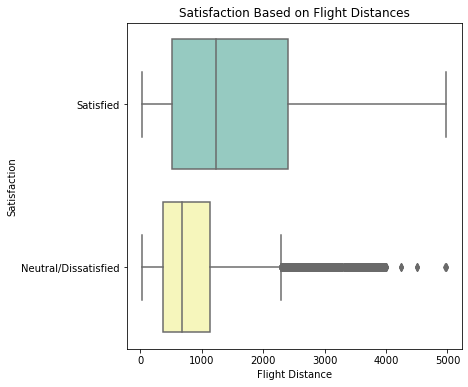

In [14]:
#Create a boxplot based on Flight Distance and Satisfaction
plt.figure(figsize=(6,6),facecolor='white')
sns.boxplot(x='Flight Distance',y='Satisfaction',data=Passengers,palette='Set3')
plt.title('Satisfaction Based on Flight Distances')

#Display the boxplot
plt.show()

### Type of Travel, Inflight Service and Satisfaction ###

A further examination of Type of Travel, Inflight Service on Satisfaction reveals that most passengers that were satisfied traveled for business purposes and gave a score of 3 or higher as opposed to those that traveled for business purposes.

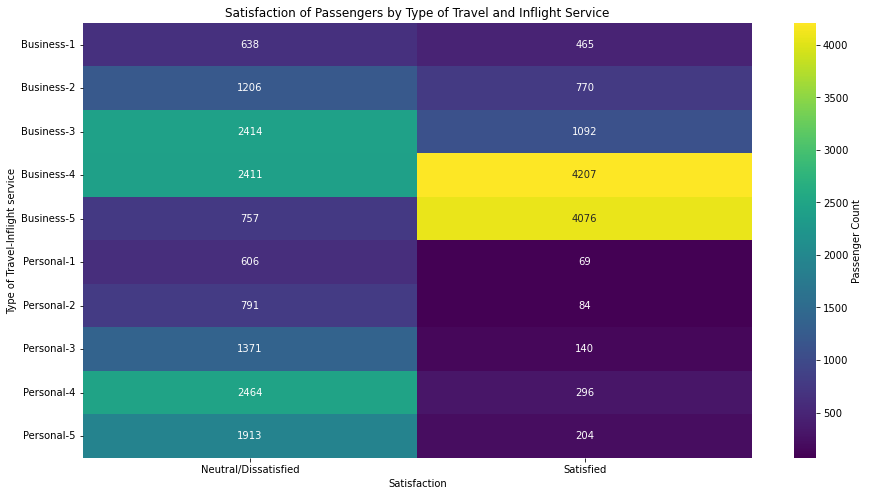

In [15]:
grouped_passenger = Passengers.groupby(['Type of Travel','Inflight service','Satisfaction']).size().unstack()

# Drop the rows which contain missing data
grouped_passenger = grouped_passenger.dropna(axis=0)

#Create heatmap
plt.figure(figsize=(15, 8),facecolor='white')
sns.heatmap(grouped_passenger, annot=True, fmt='g', cmap='viridis', cbar_kws={'label': 'Passenger Count'})
plt.title('Satisfaction of Passengers by Type of Travel and Inflight Service')
plt.show()


## Discussion ##

In this assignment, I explored data from an Airline Passenger Satisfaction dataset, and focused on relationships between Customer Type, Type of Travel, Inflight Service, and Flight Distance on Satisfaction. An exploratory analysis showed that each of these variables affected passenger satisfaction in positive or negative ways. I found that loyal passengers had a higher ratio of satisfaction as opposed to disloyal passengers however there were an almost equal number of loyal passengers that were neutral/dissatisfied which revealed that loyalty does not affect satisfaction. Passengers that flew far distances tended to be more satisfied as opposed to those that flew less. Similarly, majority of passengers that traveled for business purposes were satisfied as opposed to their counterparts. A further examination of satisfaction by type of travel and rating of inflight service revealed that majority of passengers that were satisfied traveled for business purposes and gave a rating of 3 or higher for inflight service while majority of those that were neutral/dissatisfied traveled for personal purposes and gave a rating of 3 or higher for inflight service. These analyses prove that the reason as to why passengers travel affects satisfaction the most. These outcomes suggest airlines should consider providing incentives or enhanced services for people that travel for personal purposes. Some incentives they could provide could be travel packages which provides accommodations and car rentals. These services would narrow the gap of satisfaction between people that travel for personal and business purposes. 

## References
1. Source data - https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=test.csv
2. Pandas for data manipulation
3. Seaborn for data viz
4. Matplotlib for data viz 
5. Heatmap Source - https://seaborn.pydata.org/generated/seaborn.heatmap.html
6. Heatmap Source- https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
7. Pie Chart - https://www.w3schools.com/python/matplotlib_pie_charts.asp
8. Line Graph - https://matplotlib.org/stable/tutorials/pyplot.html
